### Loading Dependencies and Loading the Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')
df

,Category,Message,vnum,numv
0,ham,"Go until jurong point, crazy.. Available only ...",sd,c
1,ham,Ok lar... Joking wif u oni...,asfsa,xc
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,sc,xzc
3,ham,U dun say so early hor... U c already then say...,xz,xzc
4,ham,"Nah I don't think he goes to usf, he lives aro...",d,cx
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN
5568,ham,Will ü b going to esplanade fr home?,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN


### Data Cleaning

In [3]:
df.shape

(5572, 4)

In [4]:
df.isna().sum()

Category       0
Message        0
vnum        5566
numv        5562
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
 2   vnum      6 non-null      object
 3   numv      10 non-null     object
dtypes: object(4)
memory usage: 174.2+ KB


In [6]:
df.drop(['vnum','numv'],axis=1,inplace=True)

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['lab_num'] = df['Category'].map({
    'ham':0,
    'spam':1
})

In [9]:
df.head()

,Category,Message,lab_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
df.duplicated().sum()

415

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5157, 3)

### EDA

In [14]:
df.head()

,Category,Message,lab_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
df.lab_num.value_counts()

0    4516
1     641
Name: lab_num, dtype: int64

In [16]:
import matplotlib.pyplot as plt

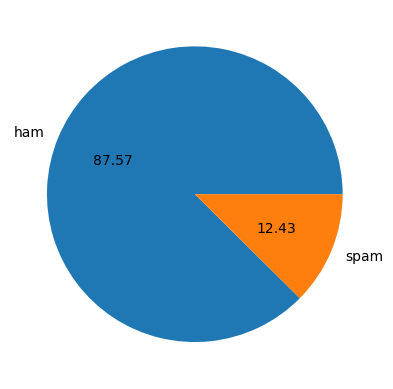

In [17]:
plt.pie(df.lab_num.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [18]:
# Data is Imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
df['num_char'] = df['Message'].apply(len)

C:\Users\Amir Hamza\AppData\Local\Temp\ipykernel_7068\1912269162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['Message'].apply(len)


In [22]:
df.head()

,Category,Message,lab_num,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [23]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Amir Hamza\AppData\Local\Temp\ipykernel_7068\2093329903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
df.head()

,Category,Message,lab_num,num_char,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [25]:
df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Amir Hamza\AppData\Local\Temp\ipykernel_7068\2232715112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,Category,Message,lab_num,num_char,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [27]:
df[df['lab_num']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['lab_num']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

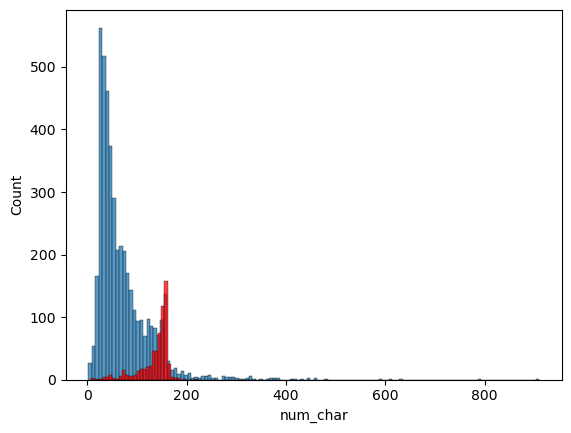

In [30]:
sns.histplot(df[df['lab_num'] == 0]['num_char'])
sns.histplot(df[df['lab_num'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

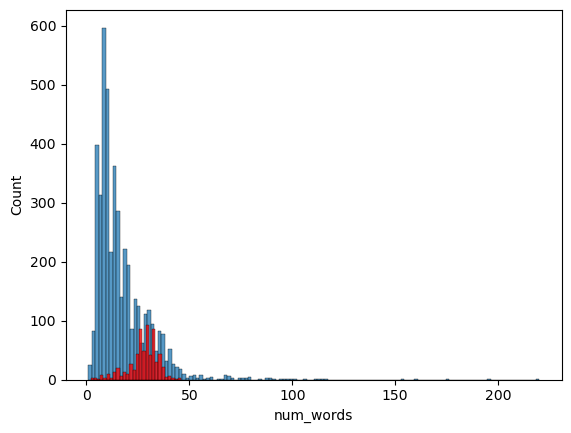

In [31]:
sns.histplot(df[df['lab_num'] == 0]['num_words'])
sns.histplot(df[df['lab_num'] == 1]['num_words'],color='red')  

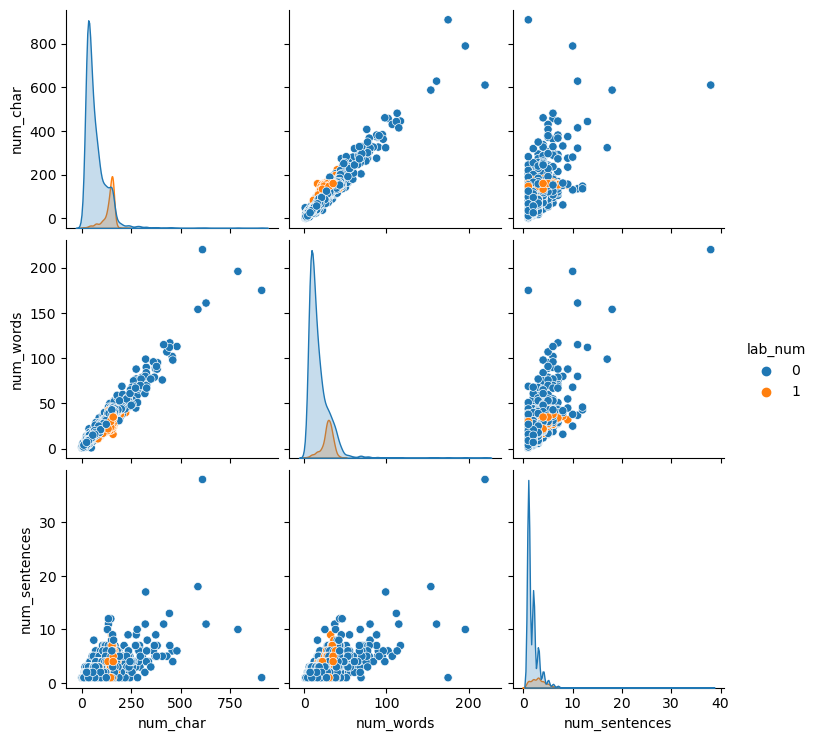

In [32]:
sns.pairplot(df,hue='lab_num')

<AxesSubplot:>

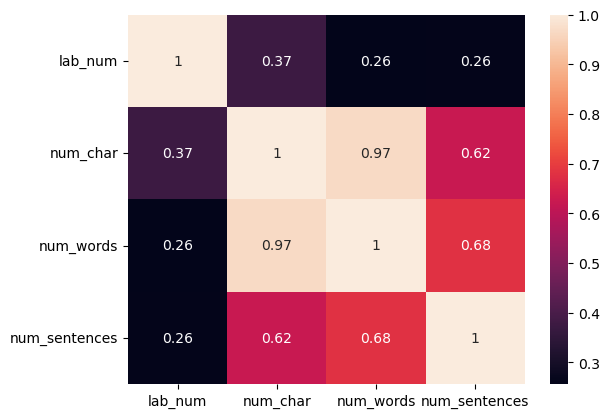

In [33]:
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

In [36]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)        

In [39]:
df['Message_process'] = df['Message'].apply(preprocess)

C:\Users\Amir Hamza\AppData\Local\Temp\ipykernel_7068\2945335490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message_process'] = df['Message'].apply(preprocess)


In [40]:
df.head()

,Category,Message,lab_num,num_char,num_words,num_sentences,Message_process
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think go usf live


In [1]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 100.4 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 100.4 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 100.4 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 100.4 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 100.4 kB/s eta 0:00:03
   --- ----------------------------------- 30.7/300.2 kB 100.4 kB/s eta 0:00:03
   --- ------------